Luise Hauptmann
# ReneWind Project
## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

___
## Importing necessary libraries

In [1]:
# reading and manipulating data
import pandas as pd
import numpy as np

# data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# missing value imputation
from sklearn.impute import SimpleImputer

# model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# metric scores and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# suppress warnings
import warnings

warnings.filterwarnings("ignore")

# help with code structure (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Loading the dataset

In [2]:
# load the csv file
df = pd.read_csv("Train.csv.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


<IPython.core.display.Javascript object>

In [3]:
# make a copy of the csv file
data = df.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
# understanding the shape of the dataset
print("The data has", data.shape[0], "rows and", data.shape[1], "columns")

The data has 20000 rows and 41 columns


<IPython.core.display.Javascript object>

In [5]:
# get info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

<IPython.core.display.Javascript object>

- The values are all numeric. 
- There is missing data in 2 columns. 

In [6]:
# check for duplicated values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

There are no duplicated values in the dataset. 

In [7]:
# check for missing values in the data
data.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

- 18 values are missing in both column V1 and V2.

In [8]:
# view statistical summary of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Plotting all the features at one go

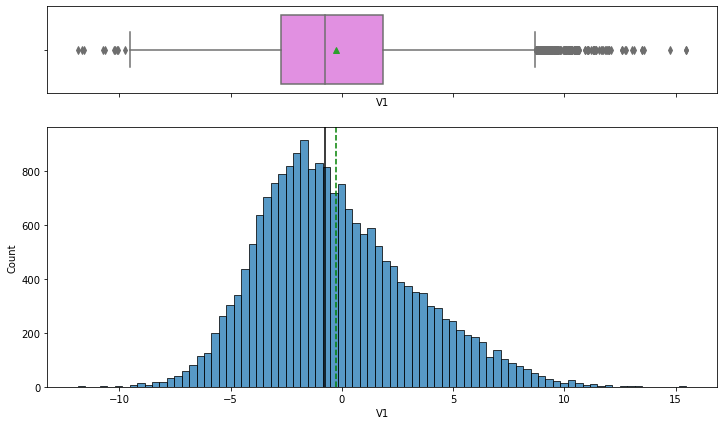

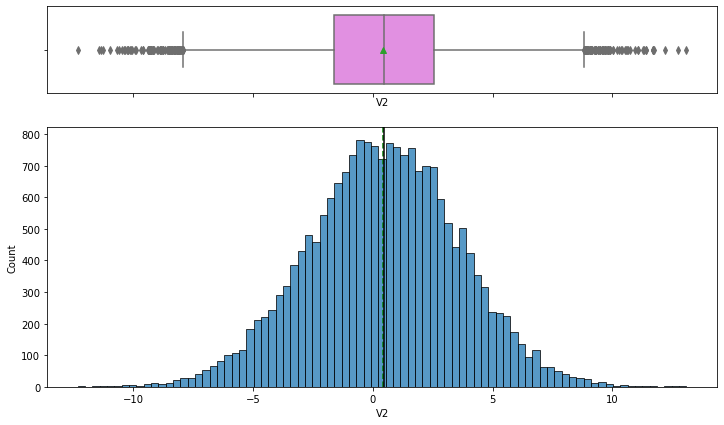

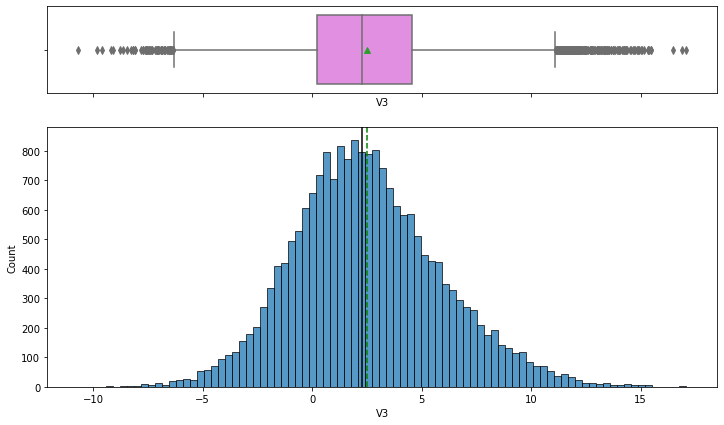

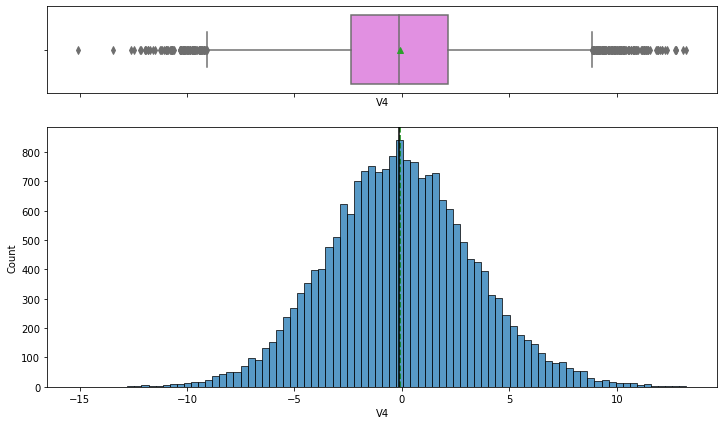

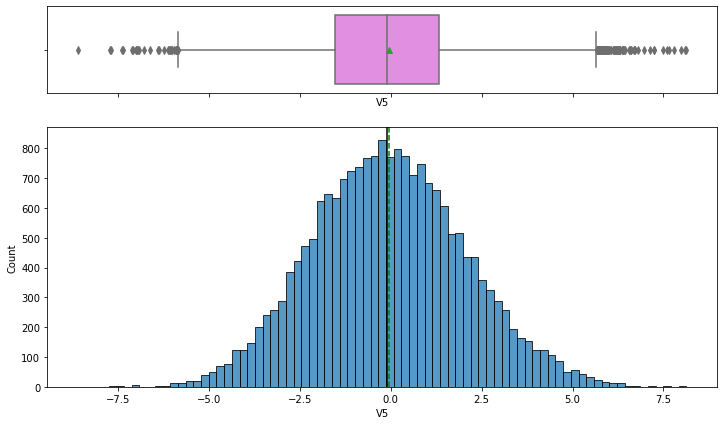

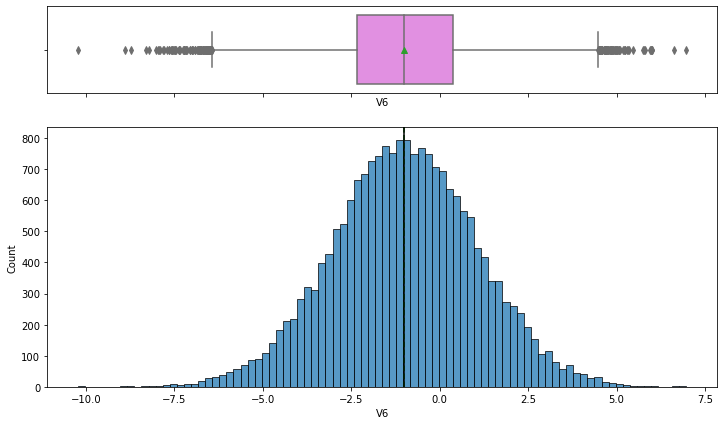

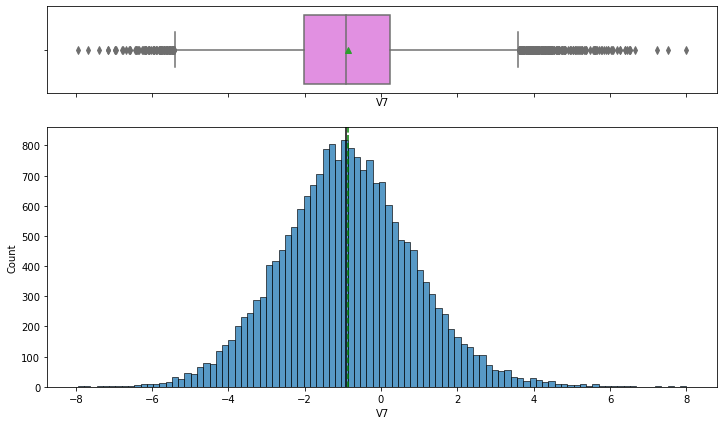

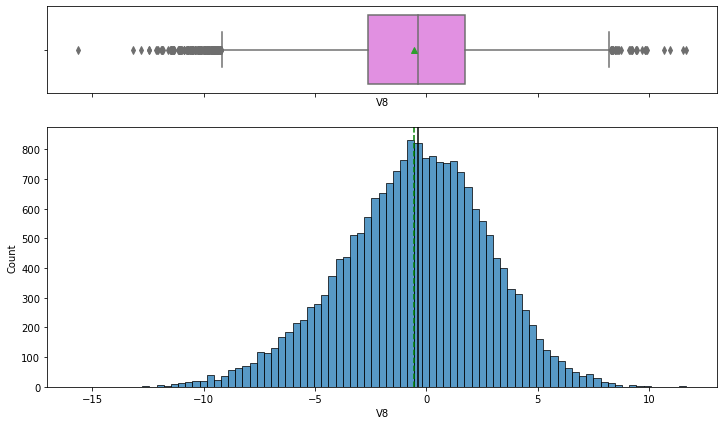

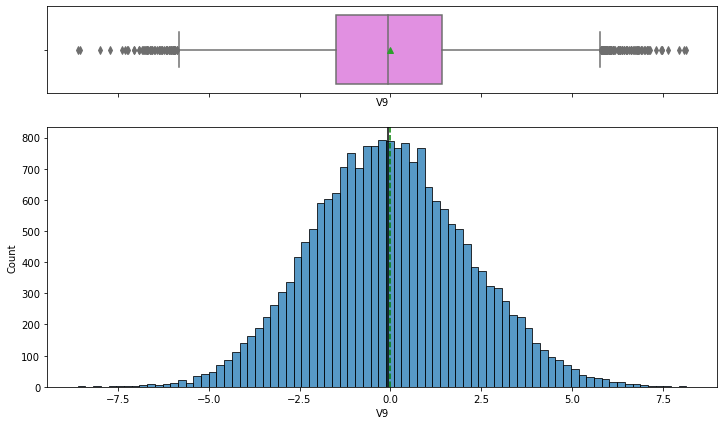

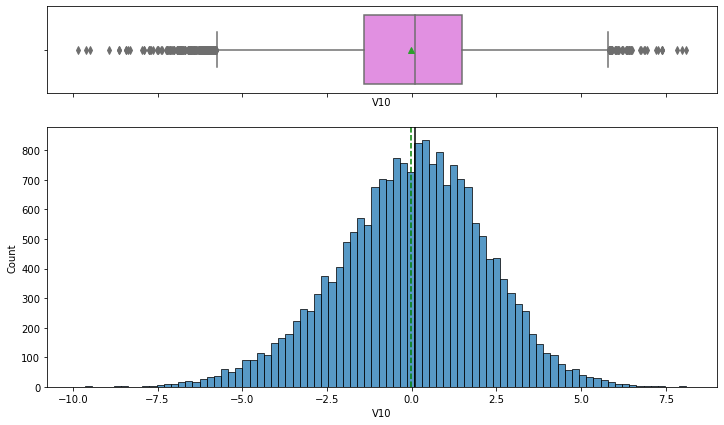

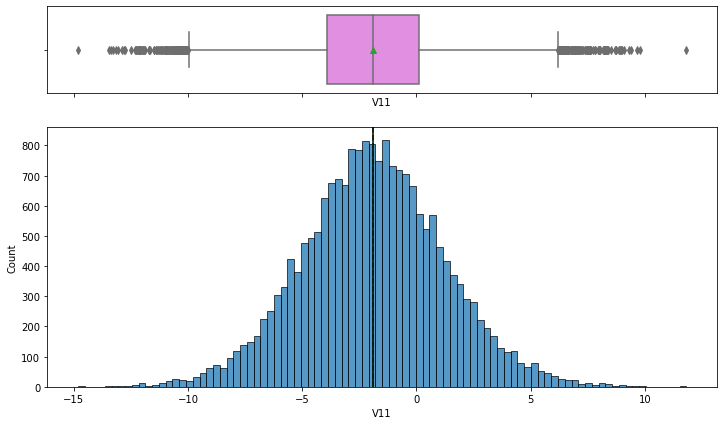

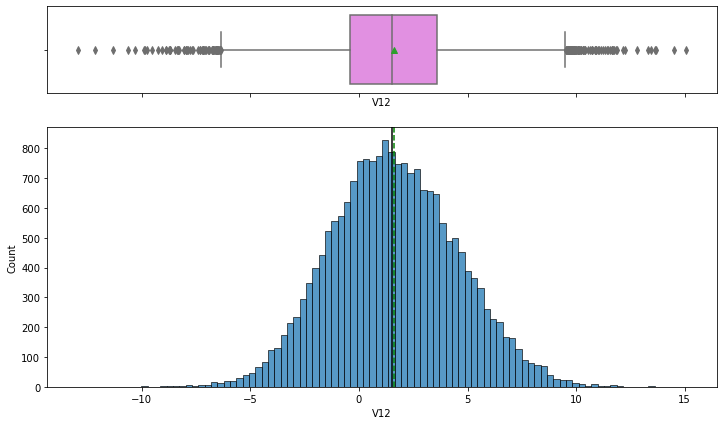

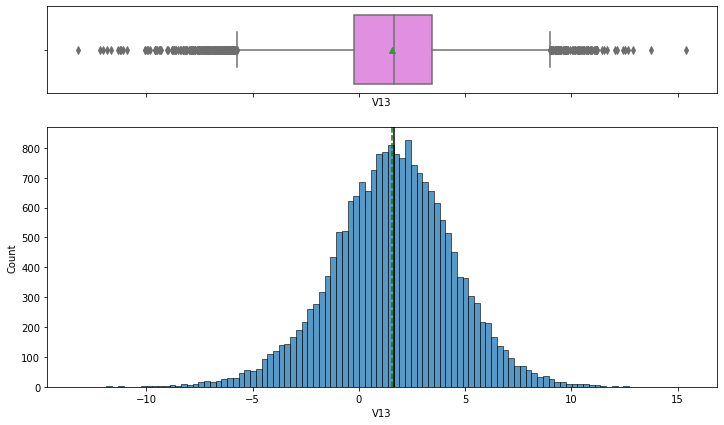

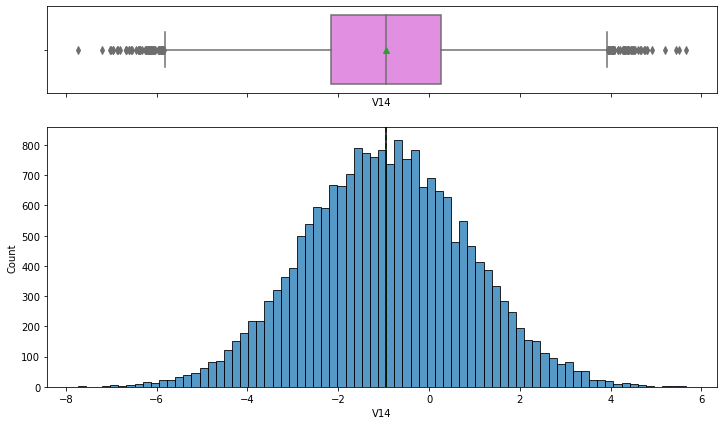

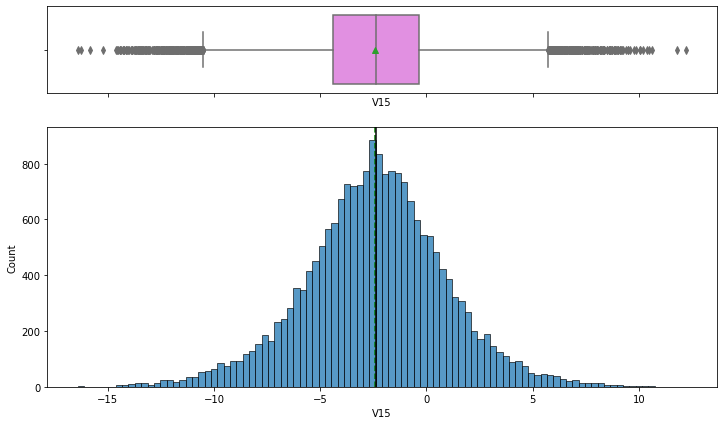

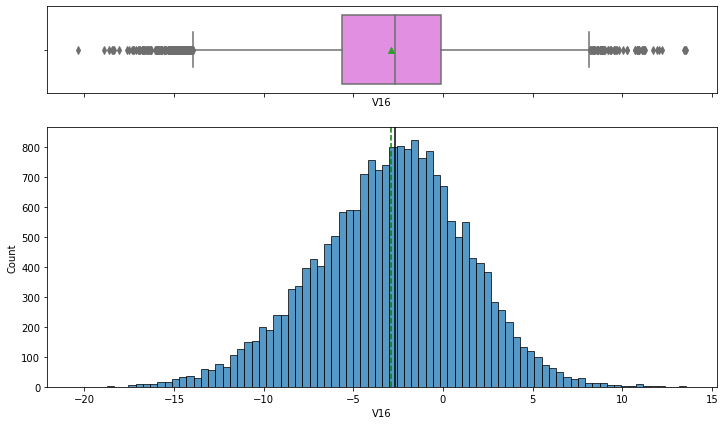

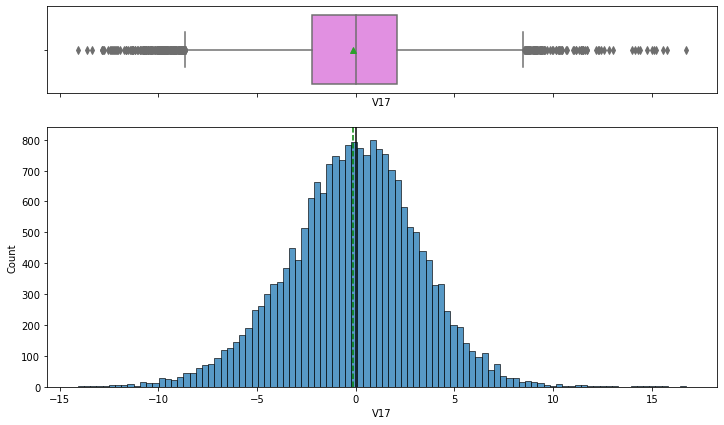

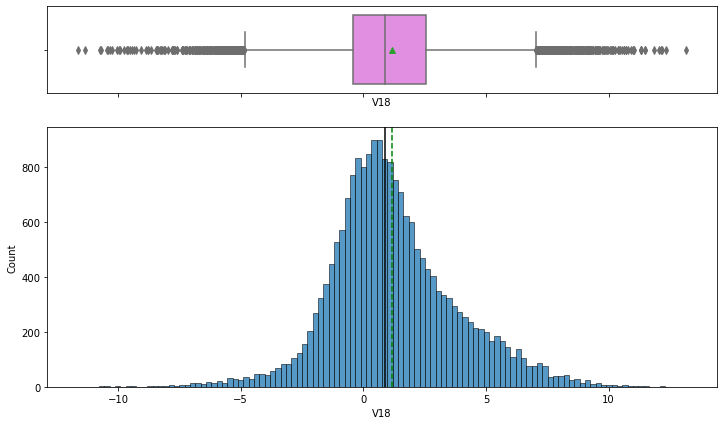

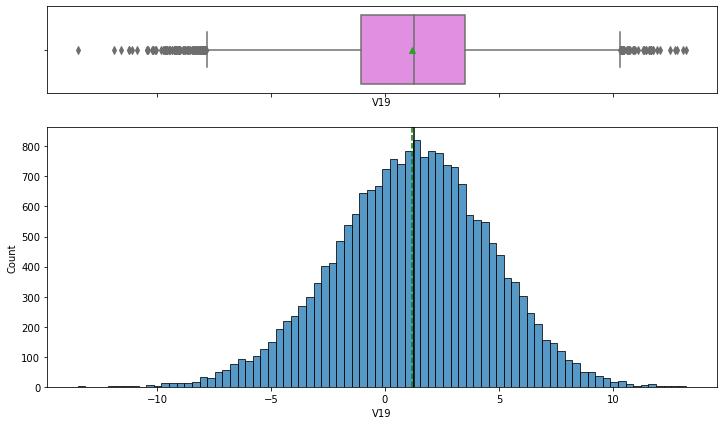

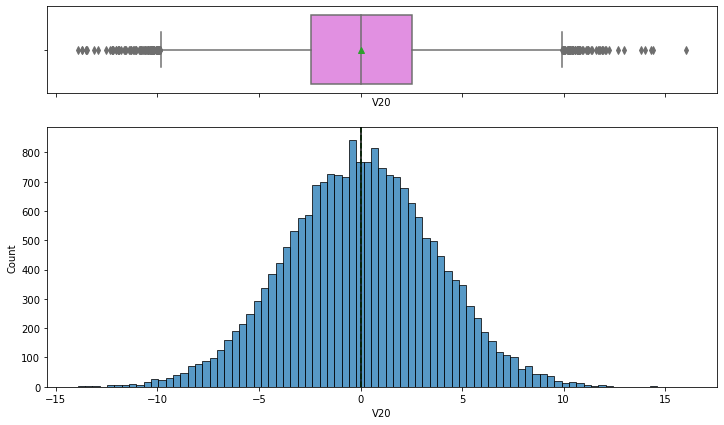

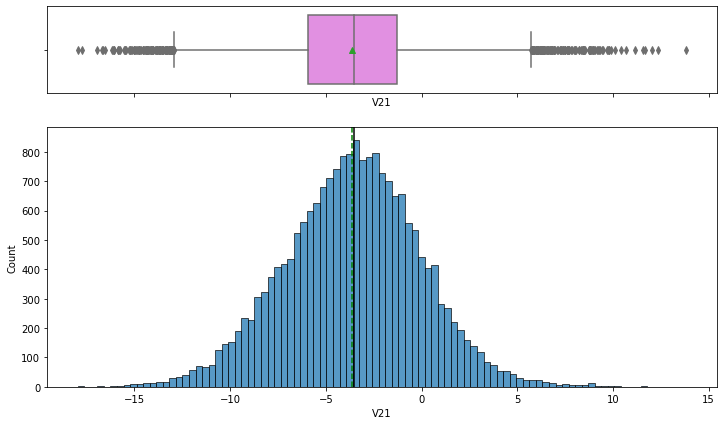

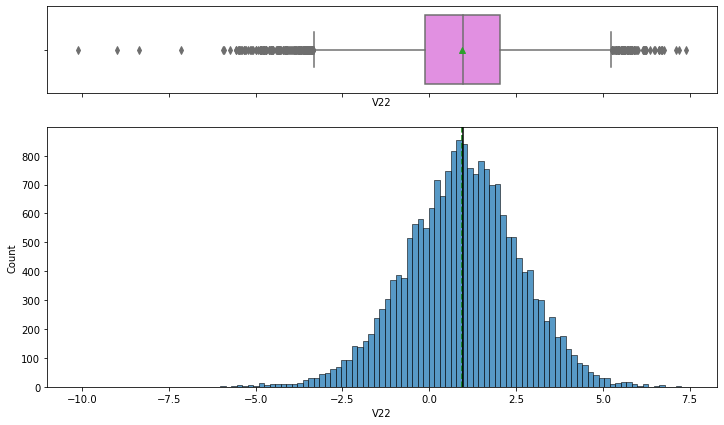

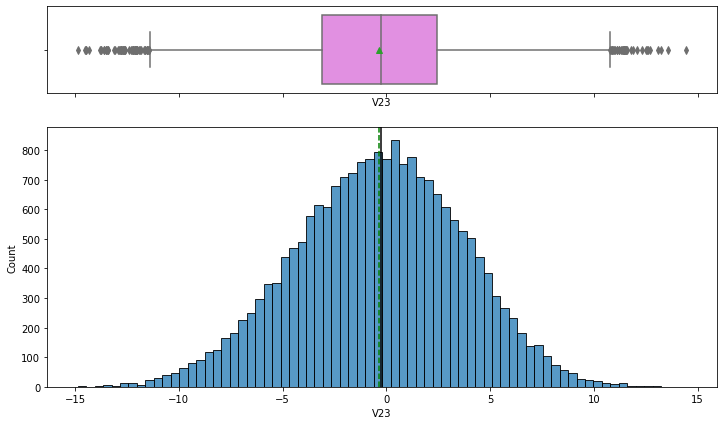

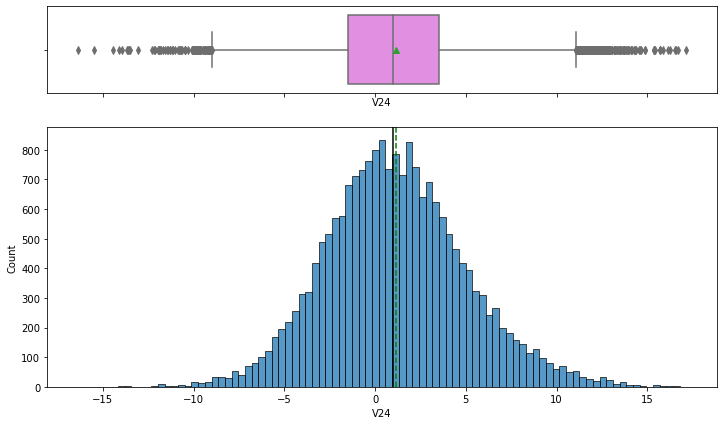

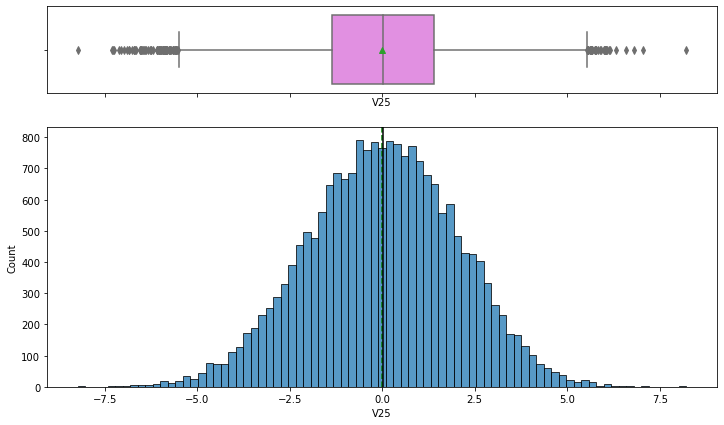

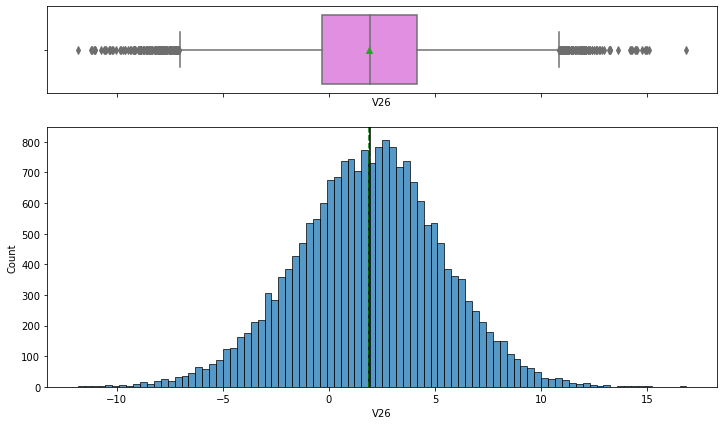

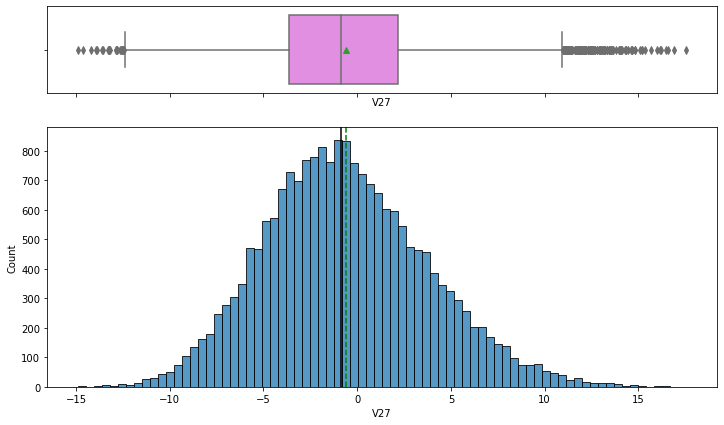

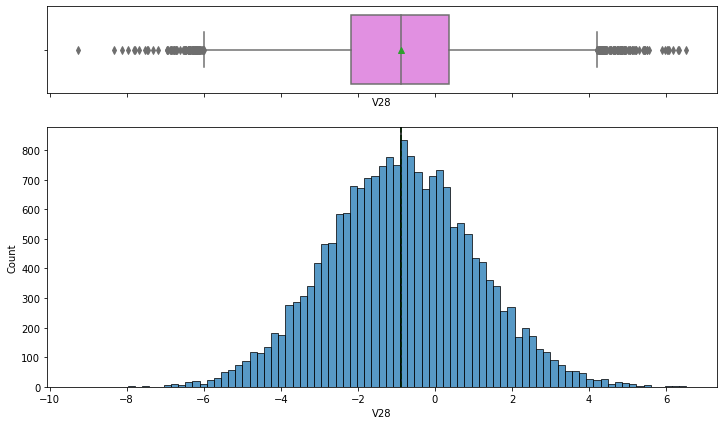

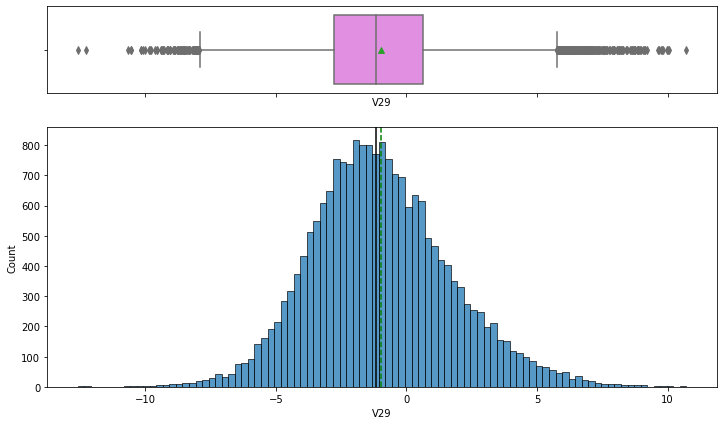

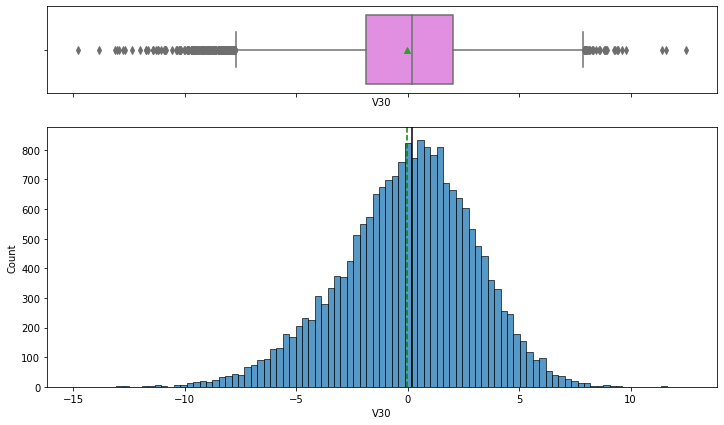

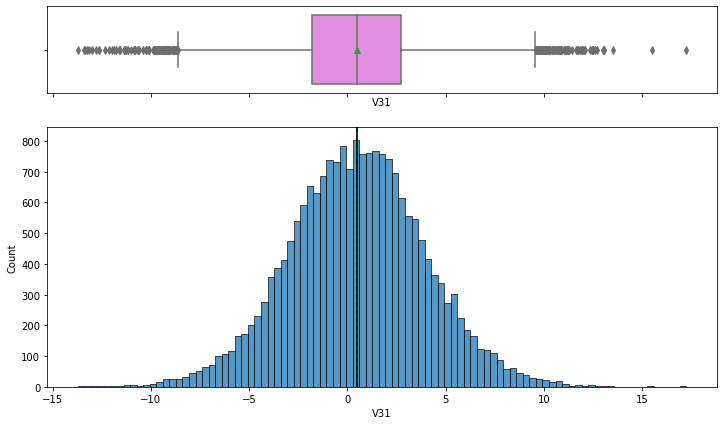

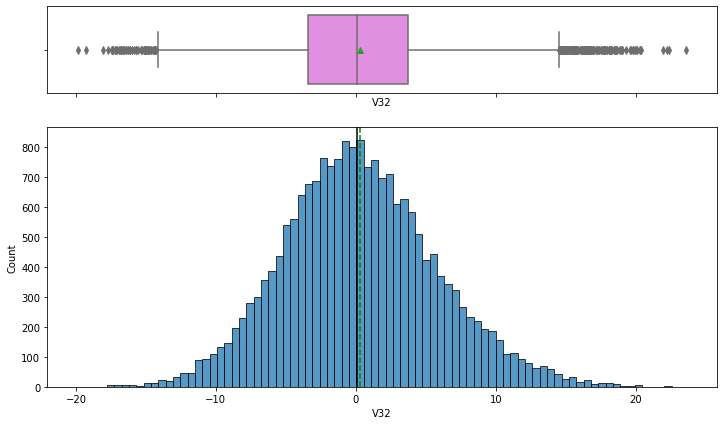

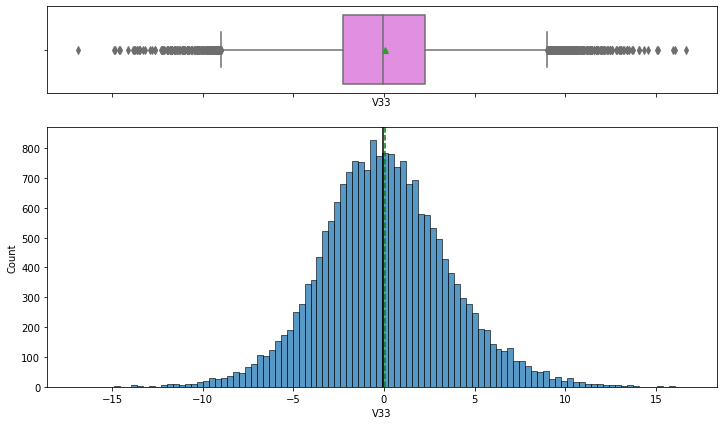

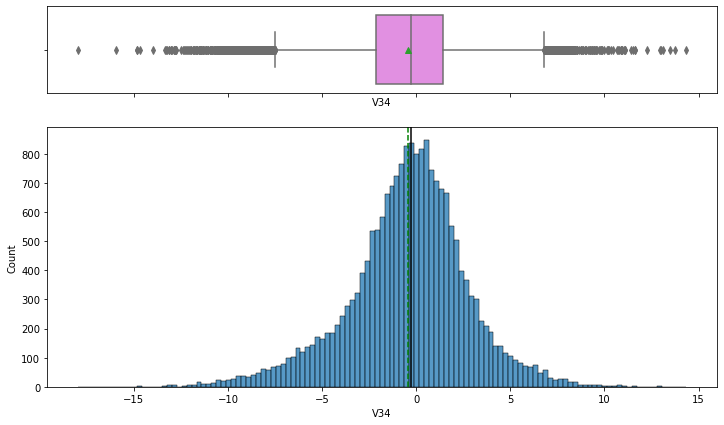

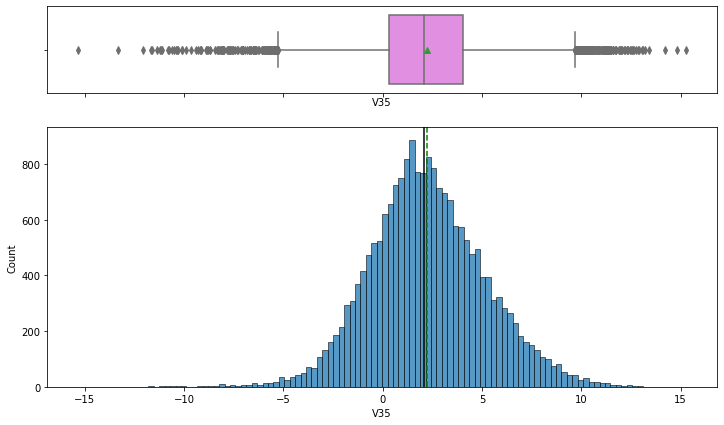

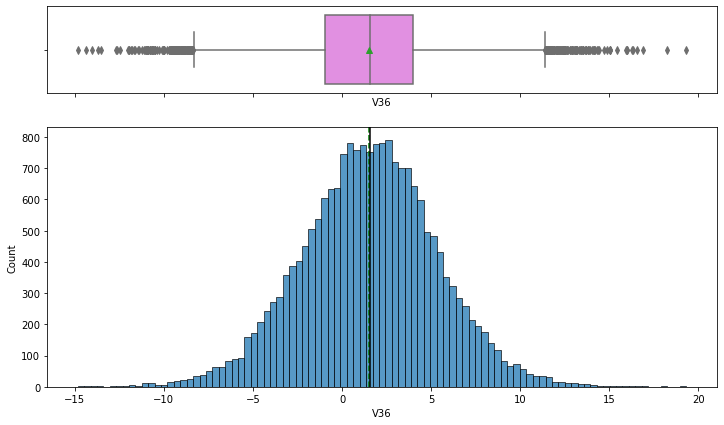

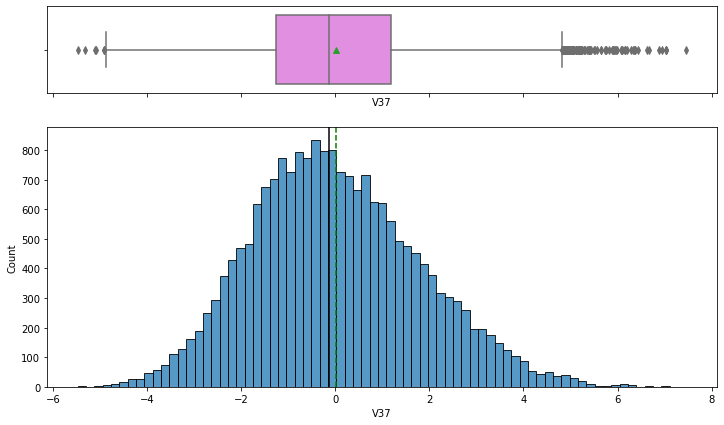

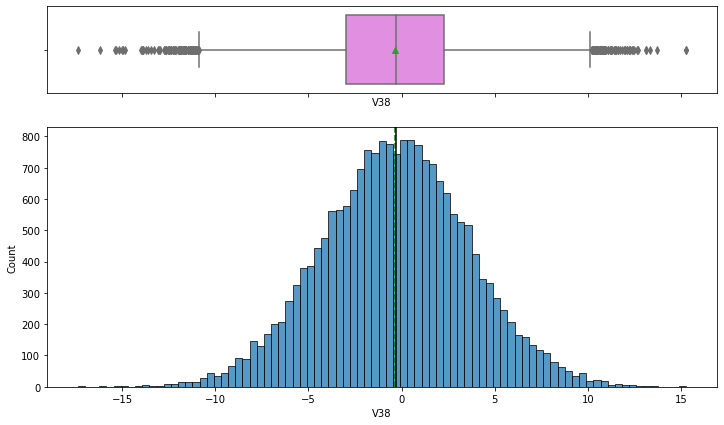

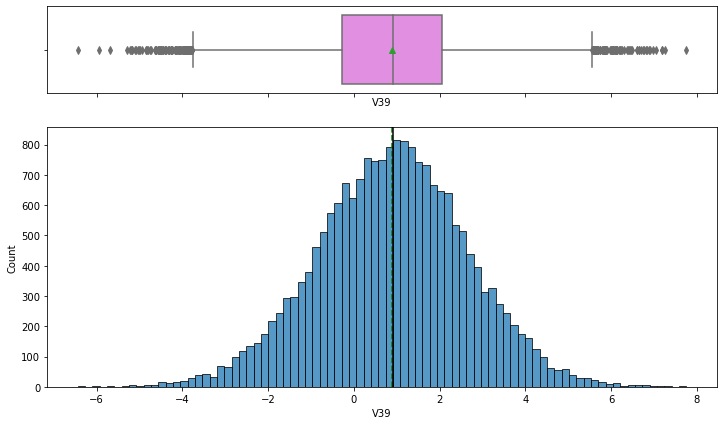

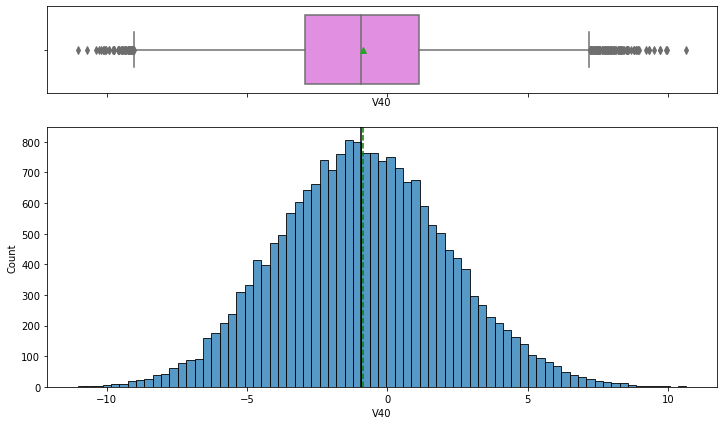

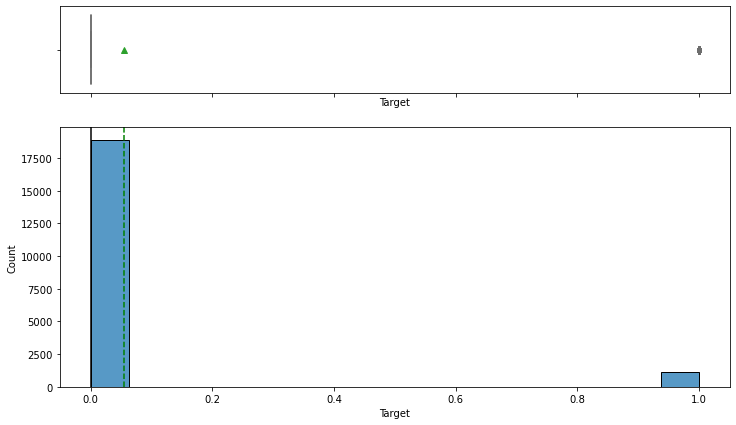

<IPython.core.display.Javascript object>

In [11]:
for feature in df.columns:
    histogram_boxplot(
        df, feature, figsize=(12, 7), kde=False, bins=None
    )  ## Please change the dataframe name as you define while reading the data

- Most columns are normally distributed, with few that are slightly skewed left or right. 
- Outliers are present in the data; however, they will not be treated as more information about the columns has not been provided. 

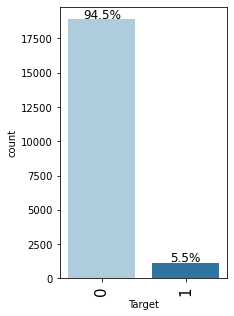

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(data, "Target", perc=True)

- The data is highly imbalanced. 

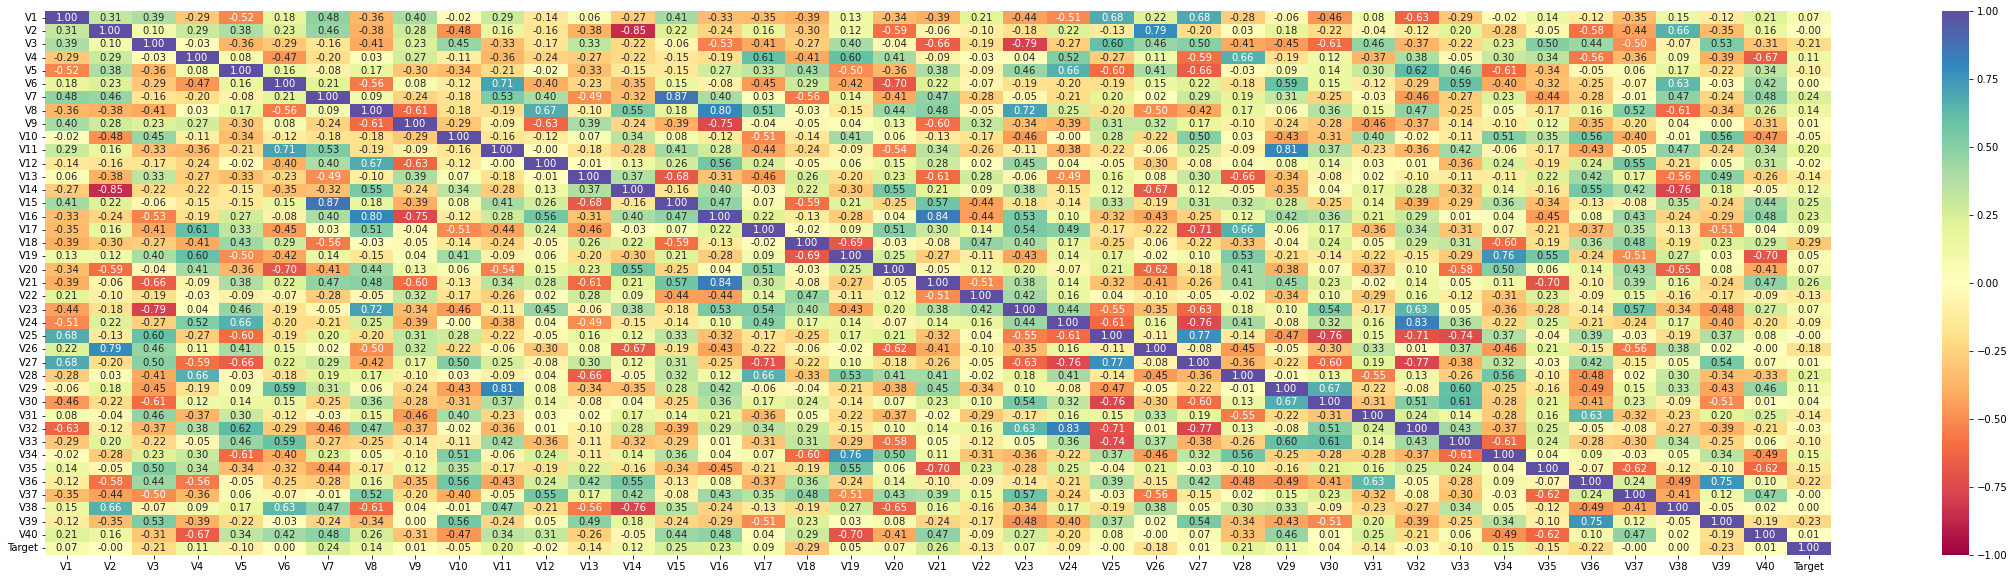

<IPython.core.display.Javascript object>

In [13]:
plt.figure(figsize=(40, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### EDA Insights:
- The train dataset has 20,000 rows and 41 columns.
- There is one target variable and 40 predictor variables. 
- All values are numeric. 
- The target variable is highly imbalanced. 
- All predictor variables show approximately normal distribution. 
- 2 columns have missing values that will be treated later. 
___

## Data Pre-processing

### Split Data

In [14]:
X = data.drop(["Target"], axis=1)
y = data["Target"]

<IPython.core.display.Javascript object>

In [15]:
# split data in training and validation sets:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

print(X_train.shape, X_val.shape)

(14000, 40) (6000, 40)


<IPython.core.display.Javascript object>

## Missing value imputation
### Missing values will be treated via median.




In [16]:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train = impute.transform(X_train)
X_val = imputer.transform(X_val)

<IPython.core.display.Javascript object>

Missing values are treated after splitting the data into train and validation sets. This ensures no data leakage. 

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [17]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [18]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [19]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

Sample Decision Tree model building with original data 

In [20]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7078246484698097

Validation Performance:

dtree: 0.7057057057057057


<IPython.core.display.Javascript object>

### Build Models with Original Data: Bagging, Random Forest, GBM, Adaboost, XG Boost, Decision Tree

In [21]:
%%time 


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.707808105872622
Random forest: 0.7194127377998345
GBM: 0.7220016542597187
Adaboost: 0.6434656741108354
Xgboost: 0.7979487179487179
dtree: 0.7078246484698097

Validation Performance:

Bagging: 0.7267267267267268
Random forest: 0.7357357357357357
GBM: 0.7357357357357357
Adaboost: 0.6516516516516516
Xgboost: 0.8198198198198198
dtree: 0.7057057057057057
CPU times: user 3min 45s, sys: 6.12 s, total: 3min 51s
Wall time: 2min 53s


<IPython.core.display.Javascript object>

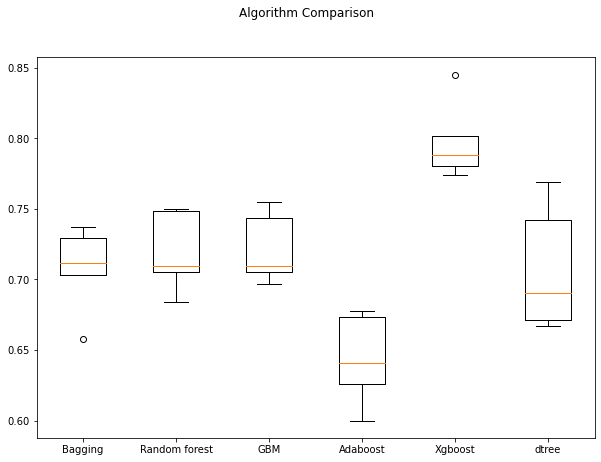

<IPython.core.display.Javascript object>

In [22]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- The cross validation performance on the training set is good for all models, The highest performance is the XGboost model, and the lowest performance is the Adaboost.

- The validation performance is highest for Xgboost and lowest for Adaboost. 
- The model does not suffer from overfitting or underfitting. 

### Model Building with Oversampled data


In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

<IPython.core.display.Javascript object>

In [24]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [25]:
%%time


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.975119441528989
Random forest: 0.9829090368319754
GBM: 0.9329201902370526
Adaboost: 0.904787470436327
Xgboost: 0.9895639018614746
dtree: 0.970128321355339

Validation Performance:

Bagging: 0.8258258258258259
Random forest: 0.8558558558558559
GBM: 0.8768768768768769
Adaboost: 0.8618618618618619
Xgboost: 0.8558558558558559
dtree: 0.7837837837837838
CPU times: user 6min 37s, sys: 8.46 s, total: 6min 45s
Wall time: 4min 47s


<IPython.core.display.Javascript object>

- Xgboost once again performed the best on the model. 
- Adaboost had the lowest performance. 

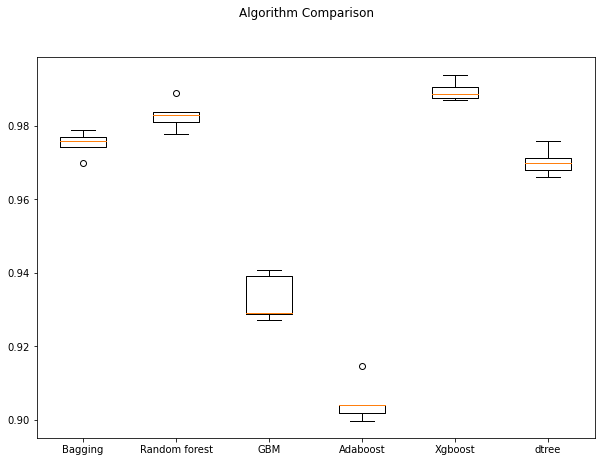

<IPython.core.display.Javascript object>

In [26]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()
     


- As described above, Xgboost showed the highest performance, followed by Random Forest, bagging, decision tree, GBM, and Adaboost. 

### Model Building with Undersampled data

In [27]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)



<IPython.core.display.Javascript object>

In [28]:
%%time


models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.880339123242349
Random forest: 0.9034822167080232
GBM: 0.8932009925558313
Adaboost: 0.8725971877584782
Xgboost: 0.897055417700579
dtree: 0.8622167080231596

Validation Performance:

Bagging: 0.8708708708708709
Random forest: 0.8828828828828829
GBM: 0.8828828828828829
Adaboost: 0.8588588588588588
Xgboost: 0.8918918918918919
dtree: 0.8408408408408409
CPU times: user 20.6 s, sys: 1.15 s, total: 21.8 s
Wall time: 12.9 s


<IPython.core.display.Javascript object>

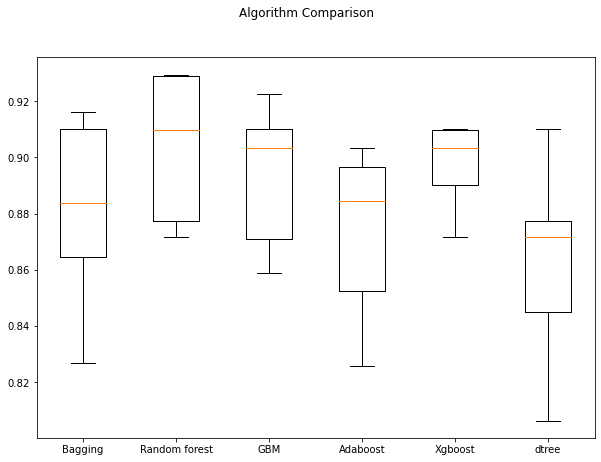

<IPython.core.display.Javascript object>

In [29]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()
     


- Random Forest and Xgboost showed the highest performance, followed by GBM, Adaboost, Bagging, and decision tree. 

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [30]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.550752688172043:


<IPython.core.display.Javascript object>

### Sample tuning method for Decision tree with oversampled data

In [31]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9240715362242579:


<IPython.core.display.Javascript object>

### Sample tuning method for Decision tree with undersampled data

In [32]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 20),
    "min_samples_leaf": [1, 2, 5, 7],
    "max_leaf_nodes": [5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.83520264681555:


<IPython.core.display.Javascript object>

### Hyperparameter tuning with Decision Tree

In [33]:
# original model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.550752688172043:


<IPython.core.display.Javascript object>

In [34]:
# oversampled model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9240715362242579:


<IPython.core.display.Javascript object>

In [35]:
# undersampled model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "max_depth": np.arange(2, 6),
    "min_samples_leaf": [1, 4, 7],
    "max_leaf_nodes": [10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 5} with CV score=0.8506368899917287:


<IPython.core.display.Javascript object>

In [36]:
# building model with best parameters
dt_tuned_grid = DecisionTreeClassifier(
    max_depth=5, min_samples_leaf=1, max_leaf_nodes=15, min_impurity_decrease=0.0001,
)

# Fit the model on training data
dt_tuned_grid.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001)

<IPython.core.display.Javascript object>

In [37]:
# training set
dt_grid_train = model_performance_classification_sklearn(
    dt_tuned_grid, X_train, y_train
)
dt_grid_train

,Accuracy,Recall,Precision,F1
0,0.976,0.631,0.911,0.745


<IPython.core.display.Javascript object>

- The training set is highly accurate and precise. 
- Recall and precision are average. 


In [38]:
# validation set
dt_grid_val = model_performance_classification_sklearn(dt_tuned_grid, X_val, y_val)
dt_grid_val

,Accuracy,Recall,Precision,F1
0,0.972,0.631,0.814,0.711


<IPython.core.display.Javascript object>

- The validation set is highly accurate and precise.
- The F1 and recall scores are comparable to the training set. 

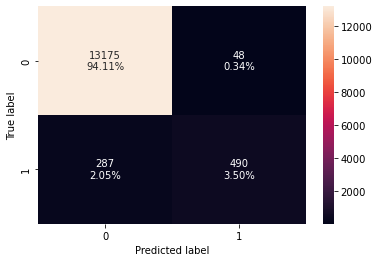

<IPython.core.display.Javascript object>

In [39]:
confusion_matrix_sklearn(dt_tuned_grid, X_train, y_train)

- The model is performing well. Accuracy and Precision are high, with decent Recall and F1. 

#### Building model with best parameters

In [40]:
# building model with best parameters
dt_tuned = DecisionTreeClassifier(
    max_depth=5, min_samples_leaf=2, max_leaf_nodes=15, min_impurity_decrease=0.0001,
)

# Fit the model on training data
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=2)

<IPython.core.display.Javascript object>

In [41]:
# check the performance on training set
dt_random_train = model_performance_classification_sklearn(dt_tuned, X_train, y_train)
dt_random_train

,Accuracy,Recall,Precision,F1
0,0.976,0.631,0.911,0.745


<IPython.core.display.Javascript object>

- The model is performing well on the training set on accuracy and precision. The recall and F1 are average. 

In [42]:
# check the performance on validation set
dt_random_val = model_performance_classification_sklearn(dt_tuned, X_val, y_val)
dt_random_val

,Accuracy,Recall,Precision,F1
0,0.972,0.631,0.814,0.711


<IPython.core.display.Javascript object>

- The validation set is performing similarly to the training set regarding all metrics. Precision has decreased significantly, however. 

### Hyperparameter tuning -- Gradient Boost

In [43]:
# original model
Model = GradientBoostingClassifier(random_state=1)

# Parameter gradient boosting to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 150, 25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample": [0.5, 0.7],
    "max_features": [0.5, 0.7],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.7400744416873449:


<IPython.core.display.Javascript object>

In [44]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features=0.7, random_state=1, learning_rate=1, n_estimators=75, subsample=0.3
)

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=75,
                           random_state=1, subsample=0.3)

<IPython.core.display.Javascript object>

In [45]:
gbm_random_train = model_performance_classification_sklearn(tuned_gbm, X_train, y_train)
gbm_random_train

,Accuracy,Recall,Precision,F1
0,0.971,0.664,0.781,0.718


<IPython.core.display.Javascript object>

- The GBM model is accurate with average recall, precision, and F1 scores. 

In [46]:
gbm_random_val = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
gbm_random_val

,Accuracy,Recall,Precision,F1
0,0.959,0.631,0.625,0.628


<IPython.core.display.Javascript object>

- The validation model is acrruate, with average recall, precision, and F1 scores.
- It is unlikely that the model is suffering from overfitting. 

#### Create a Pipeline with Best Parameters

In [47]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7, random_state=1, learning_rate=1, n_estimators=50, subsample=0.2
)

tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, n_estimators=50,
                           random_state=1, subsample=0.2)

<IPython.core.display.Javascript object>

In [48]:
gbm_grid_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm_grid_train

,Accuracy,Recall,Precision,F1
0,0.932,0.431,0.398,0.414


<IPython.core.display.Javascript object>

- Recall, precision, and F1 scores have dropped significantly. 
- Accuracy is high. 

In [49]:
gbm_grid_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm_grid_val

,Accuracy,Recall,Precision,F1
0,0.928,0.399,0.363,0.381


<IPython.core.display.Javascript object>

- The validation metric is comparable to the training set, with low recall, precision, and F1 scores. 
- Accuracy is above average. 

### AdaBoost

In [50]:
# original model
Model = AdaBoostClassifier(random_state=1)

# Parameter gradient boosting to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7709263854425144:


<IPython.core.display.Javascript object>

In [51]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=30,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

In [52]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.986,0.803,0.936,0.864


<IPython.core.display.Javascript object>

- The Adaboost model is performing well on all metrics with above average scores for accuracy, recall, precision, and F1. 

In [53]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.979,0.724,0.880,0.794


<IPython.core.display.Javascript object>

- The validation score is slightly less than the training model, with good accuracy, recall, prevision, and F1 scores. 

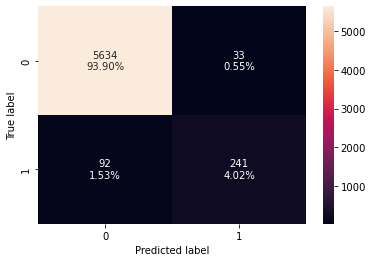

<IPython.core.display.Javascript object>

In [54]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

#### Building a model with the best parameters. 

In [55]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=20,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1, n_estimators=20, random_state=1)

<IPython.core.display.Javascript object>

In [56]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.989,0.842,0.959,0.897


<IPython.core.display.Javascript object>

- With further tuning, all four metrics increased significantly. 

In [57]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.980,0.751,0.868,0.805


<IPython.core.display.Javascript object>

- Validation returns average recall and F1 scores, with above average scores on accuracy and precision. 

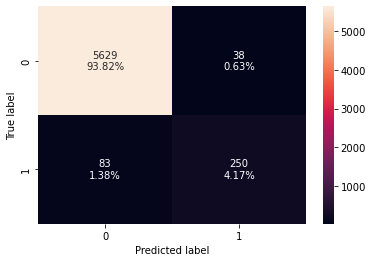

<IPython.core.display.Javascript object>

In [58]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

## Model performance comparison and choosing the final model

In [59]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_grid_train.T,
        Adaboost_random_train.T,
        gbm_grid_train.T,
        gbm_random_train.T,
        dt_grid_train.T,
        dt_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Gradient Boosting Tuned with Grid search",
    "Gradient Boosting Tuned with Random search",
    "Decision tree with grid search",
    "Decision tree with random search",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,Gradient Boosting Tuned with Grid search,Gradient Boosting Tuned with Random search,Decision tree with grid search,Decision tree with random search
Accuracy,0.986,0.989,0.932,0.971,0.976,0.976
Recall,0.803,0.842,0.431,0.664,0.631,0.631
Precision,0.936,0.959,0.398,0.781,0.911,0.911
F1,0.864,0.897,0.414,0.718,0.745,0.745


<IPython.core.display.Javascript object>

- Adaboost tuned with Random search returned the highest accuravy, recall, prevision, and F1 scores. 

In [60]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        Adaboost_grid_val.T,
        Adaboost_random_val.T,
        gbm_grid_val.T,
        gbm_random_val.T,
        dt_grid_val.T,
        dt_random_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost Tuned with Grid search",
    "AdaBoost Tuned with Random search",
    "Gradient Boosting Tuned with Grid search",
    "Gradient Boosting Tuned with Random search",
    "Decision tree with grid search",
    "Decision tree with random search",
]
print("Validation performance comparison:")
models_val_comp_df
     


Validation performance comparison:


,AdaBoost Tuned with Grid search,AdaBoost Tuned with Random search,Gradient Boosting Tuned with Grid search,Gradient Boosting Tuned with Random search,Decision tree with grid search,Decision tree with random search
Accuracy,0.979,0.980,0.928,0.959,0.972,0.972
Recall,0.724,0.751,0.399,0.631,0.631,0.631
Precision,0.880,0.868,0.363,0.625,0.814,0.814
F1,0.794,0.805,0.381,0.628,0.711,0.711


<IPython.core.display.Javascript object>

- Adaboost once again returned the highest scores for all four metrics. 

### Test set final performance

In [61]:
# Load test data
test_data = pd.read_csv("Test.csv.csv")
# Separating target variable and other variables
X_test = test_data.drop(columns="Target", axis=1)
y_test = test_data["Target"]

<IPython.core.display.Javascript object>

In [62]:
# check shape of test set
test_data.shape

(5000, 41)

<IPython.core.display.Javascript object>

In [63]:
# let's check for duplicate values in the data
test_data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [64]:
# let's check for missing values in the data
test_data.isnull().sum()


V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

In [65]:
X_test = imputer.transform(X_test)

<IPython.core.display.Javascript object>

- I will treat the missing values in the test set with a data imputer as used above. 

In [66]:
# Calculating different metrics on the test set
adaboost_random_test = model_performance_classification_sklearn(
    adb_tuned2, X_test, y_test
)
print("Test performance:")
adaboost_random_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.977,0.702,0.865,0.775


<IPython.core.display.Javascript object>

- The test set does not appear to suffer from overfitting. 
- Accuracy, Recall, Precision, and F1 scores are all above average and performing well. 

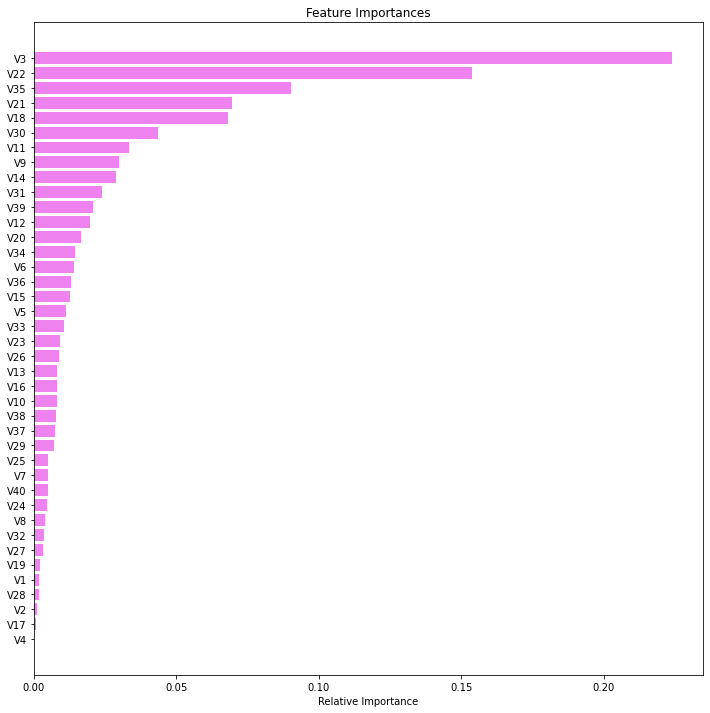

<IPython.core.display.Javascript object>

In [67]:
feature_names = X.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Columns V3 is most important in building the dataset. 

## Pipelines to build the final model


In [68]:
# creating a list of numerical variables
numerical_features = [
    "V15",
    "V7",
    "V18",
    "V14",
    "V13",
    "V35",
    "V21"
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
    ]
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [69]:
# Separating target variable and other variables
X = df.drop(columns="Target")
Y = df["Target"]

<IPython.core.display.Javascript object>

In [70]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(16000, 40) (4000, 40)


<IPython.core.display.Javascript object>

In [71]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "AdaBoostClassifier",
            AdaBoostClassifier(
                base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
                learning_rate=1,
                n_estimators=20,
                random_state=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V15', 'V7', 'V18', 'V14',
                                                   'V13', 'V35', 'V21'])])),
                ('AdaBoostClassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=20,
                                    random_state=1))])

<IPython.core.display.Javascript object>

In [72]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(model, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.965,0.559,0.747,0.639


<IPython.core.display.Javascript object>

- The pipeline model returns lower recall and precision than the tuned Adaboost model. 
- Accuracy is above average. 

# Business Insights and Conclusions

## Business Insights:
- Variable V3 is the most important feature in the model to predict the target variable.
- Adaboost tuned with grid search and random search returned similar results with high accuracy and otherwise high average metrics.
- I chose not to tune the XGboost model due to extremely high run times when building the model.
- The best performance was seen with the oversampled data.
- Undersampled data had decent performance, however much of the information was lost as rows were removed.
- The original data returned the lowest scores due to the high imbalance in the dataset.
- Because the variables did not offer specific information, outlier detection and treatment was not possible.
- If provided with specific information on the variables, the model could have had higher performance. Though it is understood that the data was censored due to privacy concerns. 

## Recommendations:
- ReneWind performs predictive maintenance, meaning that maintenance is performed prior to a part failing. 
- ReneWind should use the Adaboost model tuned with random seach, as it returned the highest accuracy. The Adaboost model tuned with grid search also performed well; however, grid search takes more RAM as well as time. Therefore, with the cost of time and resources, I recommend using the Adaboost model tuned by random search. 
- While environmental factors such as wind speed, air temperature, and humidity cannot be controlled, the wind turbine itself has features that are controllable. The gearbox, tower, blades, and breaks are all mechanical features that should be tuned and adjusted day-by-day in order to increase effective use of the turbine, and allow better maitenance of the entire unit.
- If humidity is over a certain level, the wind turbines should be used with caution. Water leakage in the unit could cause premature ageing of the unit. 

# Conclusions:
- The Adaboost model tuned with random search had the highest accuracy with 98.9%, recall of 84.2%, precision of 95.9%, and F1 of 89.7%. With metrics this accurate, ReneWind should use the Adaboost model in order to predict the maitenance of the turbines. 
- In order to create a better model, ReneWind can use the current model as an example, and futher tune the model with more information. Much of data preprocessing was unable to be completed due to the lack of information provided about the variables. 
- ReneWind could increase the number of sensors to increase the sample size, and further tune the model. 

***